In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC

# Load Data

In [2]:
# Load
data = pd.read_csv('./csv/rgb/2020/jan/result_15_each_class.csv')

In [3]:
data

,Mean_Blue,Mean_Green,Mean_Red,Label
0,222.101807,259.496606,164.454587,0
1,222.257738,251.081349,150.127579,0
2,210.348214,227.333333,179.500000,0
3,153.578125,160.918750,119.521875,0
4,133.746241,138.572682,100.201754,0
...,...,...,...,...
70,695.432806,539.820158,497.669960,4
71,653.573975,745.014260,792.581105,4
72,485.931818,563.387987,644.920455,4
73,280.490000,281.800000,192.240000,4


# Setup data for Training and Testing

In [4]:
X = data[['Mean_Blue', 'Mean_Green', 'Mean_Red']]
y = data['Label']

In [5]:
classifier = SVC(
    C=10,
    kernel='rbf',
    gamma='auto',
)

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Model

In [7]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
classifier.fit(X_train_scaled, y_train)

SVC(C=10, gamma='auto')

# Model Evaluation

In [8]:
cv_scores = cross_val_score(classifier, X_train_scaled, y_train, cv=10)

print("Cross-validation scores:", cv_scores)
print("Mean CV score:", cv_scores.mean())

Cross-validation scores: [0.66666667 0.5        0.5        0.33333333 0.66666667 0.5
 0.33333333 0.5        0.5        0.66666667]
Mean CV score: 0.5166666666666667


In [9]:
X_scaled = scaler.transform(X)
y_pred = cross_val_predict(classifier, X_scaled, y, cv=10)

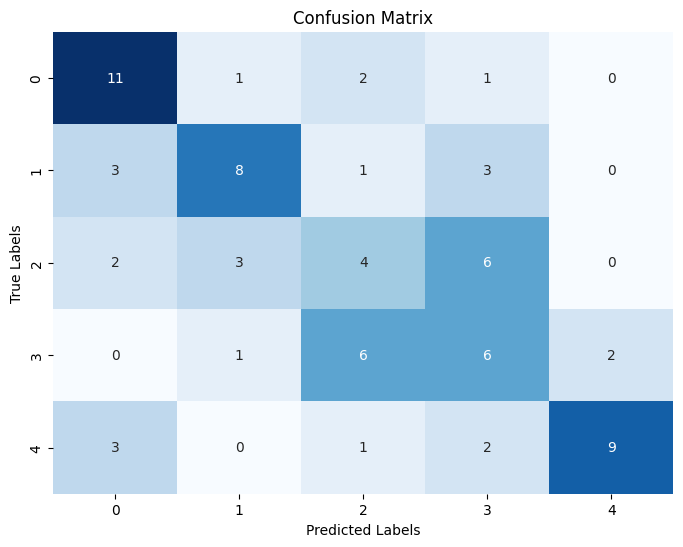

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

cm = confusion_matrix(y, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

In [11]:
report = classification_report(y, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.58      0.73      0.65        15
           1       0.62      0.53      0.57        15
           2       0.29      0.27      0.28        15
           3       0.33      0.40      0.36        15
           4       0.82      0.60      0.69        15

    accuracy                           0.51        75
   macro avg       0.53      0.51      0.51        75
weighted avg       0.53      0.51      0.51        75

